**ĐỒ ÁN KẾT THÚC HỌC PHẦN**

***Thống kê mô tả***

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('Inc_Exp_Data.csv')

In [4]:
df.sample(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
21,32000,15000,4,0,445440,Professional,1
30,45000,25000,6,0,523800,Graduate,3
1,6000,7000,2,3000,79920,Illiterate,1
42,70000,9000,2,0,756000,Graduate,1
35,47000,15000,7,0,456840,Professional,4
12,23400,5000,3,0,292032,Illiterate,1
27,40000,10000,4,0,412800,Under-Graduate,1
38,55000,45000,6,12000,600600,Graduate,2
15,25000,12300,3,0,246000,Graduate,1
19,30000,13000,4,0,385200,Graduate,1


*Kiểu định lượng*

In [30]:
dinh_luong = {}
columns_dinh_luong = ['Mthly_HH_Income', 'Mthly_HH_Expense', 'Emi_or_Rent_Amt', 'Annual_HH_Income']
for column in columns_dinh_luong:
    print(column)
    mo_ta = df[column].describe()
    print(mo_ta)
    dinh_luong[column] = df[column]
    print('')

Mthly_HH_Income
count        50.000000
mean      41558.000000
std       26097.908979
min        5000.000000
25%       23550.000000
50%       35000.000000
75%       50375.000000
max      100000.000000
Name: Mthly_HH_Income, dtype: float64

Mthly_HH_Expense
count       50.000000
mean     18818.000000
std      12090.216824
min       2000.000000
25%      10000.000000
50%      15500.000000
75%      25000.000000
max      50000.000000
Name: Mthly_HH_Expense, dtype: float64

Emi_or_Rent_Amt
count       50.000000
mean      3060.000000
std       6241.434948
min          0.000000
25%          0.000000
50%          0.000000
75%       3500.000000
max      35000.000000
Name: Emi_or_Rent_Amt, dtype: float64

Annual_HH_Income
count    5.000000e+01
mean     4.900190e+05
std      3.201358e+05
min      6.420000e+04
25%      2.587500e+05
50%      4.474200e+05
75%      5.947200e+05
max      1.404000e+06
Name: Annual_HH_Income, dtype: float64



*Kiểu định tính*

In [40]:
dinh_tinh = {}
columns_dinh_tinh = ['No_of_Fly_Members', 'Highest_Qualified_Member', 'No_of_Earning_Members']

In [42]:
for column in columns_dinh_tinh:
    print(column)
    dinh_tinh[column] = df[column]
    print('')

No_of_Fly_Members

Highest_Qualified_Member

No_of_Earning_Members



In [27]:
df['No_of_Fly_Members'].value_counts()

4    15
6    10
3     9
2     8
5     5
7     2
1     1
Name: No_of_Fly_Members, dtype: int64

In [28]:
df['No_of_Earning_Members'].value_counts()

1    33
2    12
3     4
4     1
Name: No_of_Earning_Members, dtype: int64

In [29]:
df['Highest_Qualified_Member'].describe()

count           50
unique           5
top       Graduate
freq            19
Name: Highest_Qualified_Member, dtype: object

**Vẽ Biểu Đồ**

In [36]:
data_dinh_luong = pd.DataFrame(dinh_luong)

In [44]:
data_dinh_tinh = pd.DataFrame(dinh_tinh)

*Đối với kiểu dữ liệu định tính thì sử dụng bar chart nằm ngang*

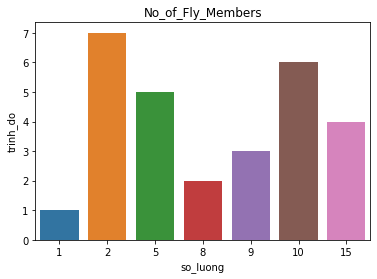

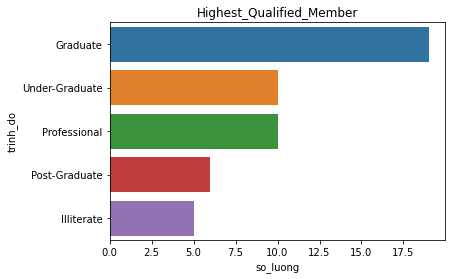

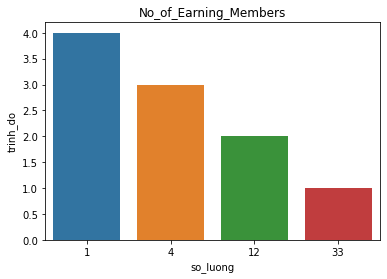

In [45]:
for column in data_dinh_tinh.columns:
    p = {}
    so_luong = []
    #print(data_dinh_tinh[column].value_counts())
    dem_data = data_dinh_tinh[column].value_counts()
    trinh_do = dem_data.index
    for i in dem_data:
        so_luong.append(i)
    p = {'trinh_do':trinh_do, 'so_luong':so_luong}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'trinh_do', x= 'so_luong', data = data)
    plt.show()

In [8]:
data_dinh_tinh_2 = df[['No_of_Fly_Members','No_of_Earning_Members']]

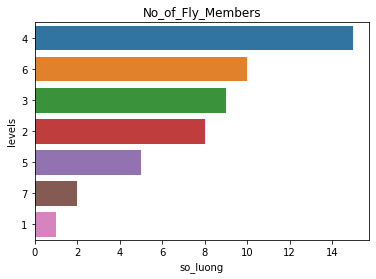

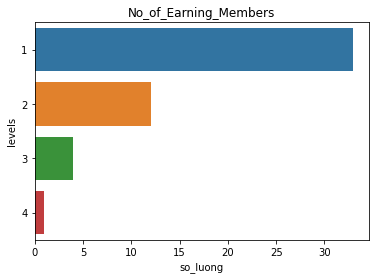

In [23]:
for column in data_dinh_tinh_2.columns:
    p = {}
    so_luong = []
    levels = []
    #print(data_dinh_tinh[column].value_counts())
    dem_data = data_dinh_tinh_2[column].value_counts()
    levels_0 = dem_data.index
    for level in levels_0:
        levels.append(str(level))
    for i in dem_data:
        so_luong.append(i)
    p = {'levels':levels, 'so_luong':so_luong}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'levels', x = 'so_luong', data = data)
    plt.show()

*Đối với kiểu dữ liệu định lượng thì vẽ histogram*

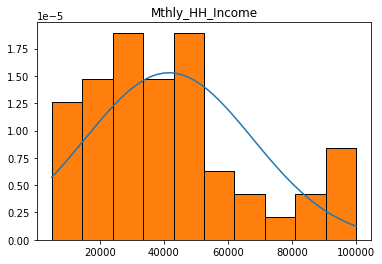

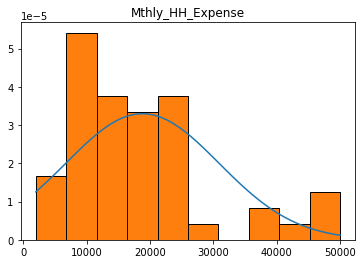

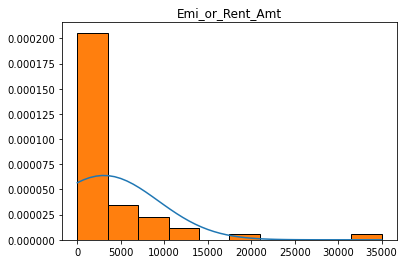

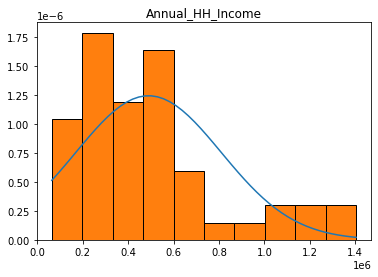

In [37]:
for column in data_dinh_luong.columns:
    data = data_dinh_luong[column]
    # kiem tra data co chuan hay khong?
    mean = np.mean(data)
    # ddof = 1 :: hiệu chỉnh
    std = np.std(data,ddof=1)
    domain = np.linspace(np.min(data),np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    # density = True :: chuẩn hóa dữ liệu vè normal
    plt.hist(data, edgecolor='black', density = True)
    plt.title(column)
    plt.show()